## Esercizio 11.1: Fit lineare
È richiesto di eseguire un fit lineare ottimizzando i pesi di una rete neurale composta da un solo neurone. Il neurone è preso con funzione di attivazione identità di modo che $$x \mapsto y=wx+b $$

La rete è allenata su $N_{train}$ dati costruiti con una relazione lineare, alla quale è aggiunto del rumore gaussiano con varianza $\sigma^2$. Il dataset di allenamento è diviso in batch di 32 elementi, ed è ripetuto $N_{epoch}$ volte. 

Di seguito sono presentati i risultati prodotti dalla rete allenata le possibili combinazioni dei seguenti parametri:

$N_{train} = 100, 1000, 10000$

$N_{epoch} = 10, 30, 40$

$\sigma = 0, 0.2, 0.5$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


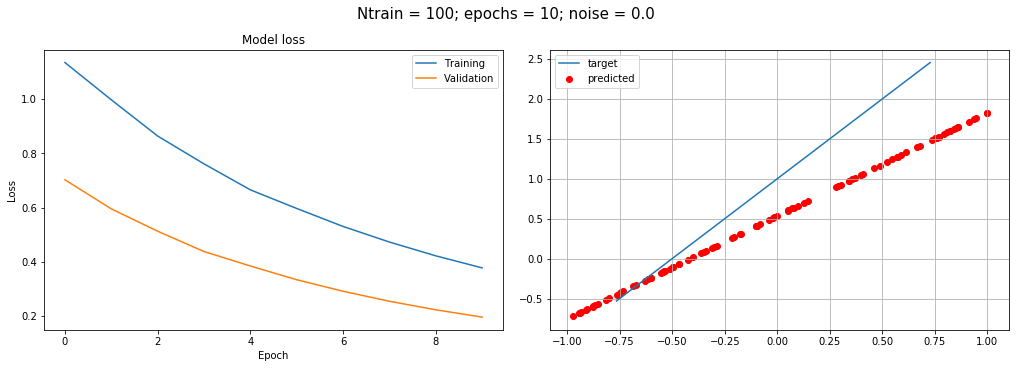

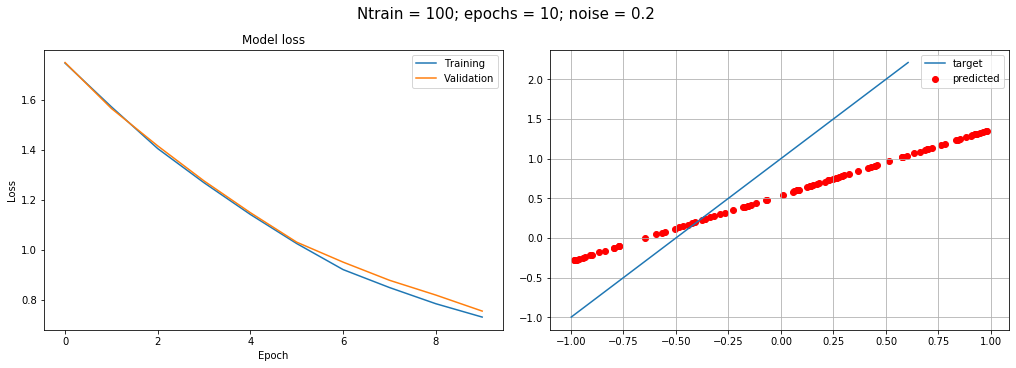

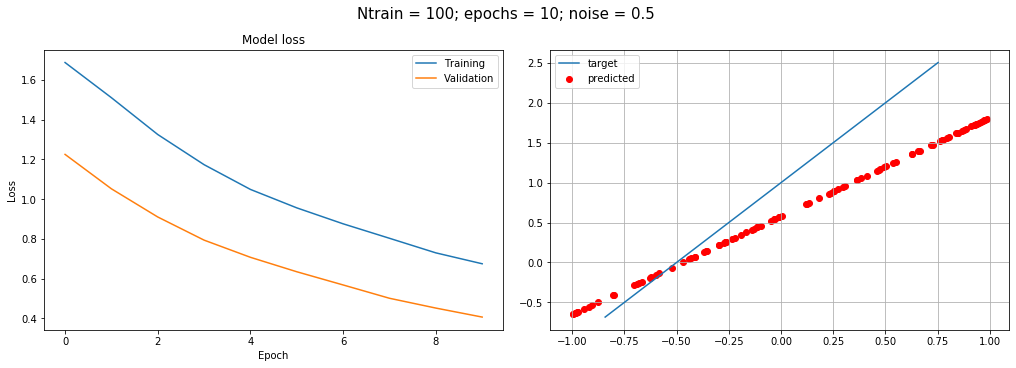

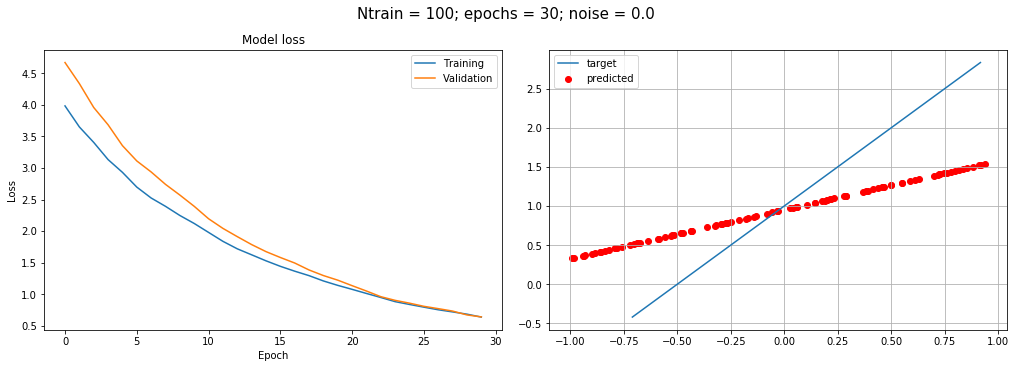

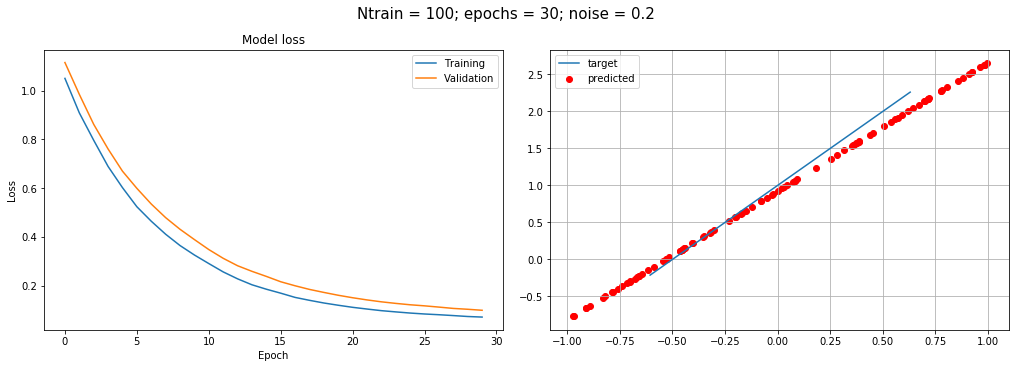

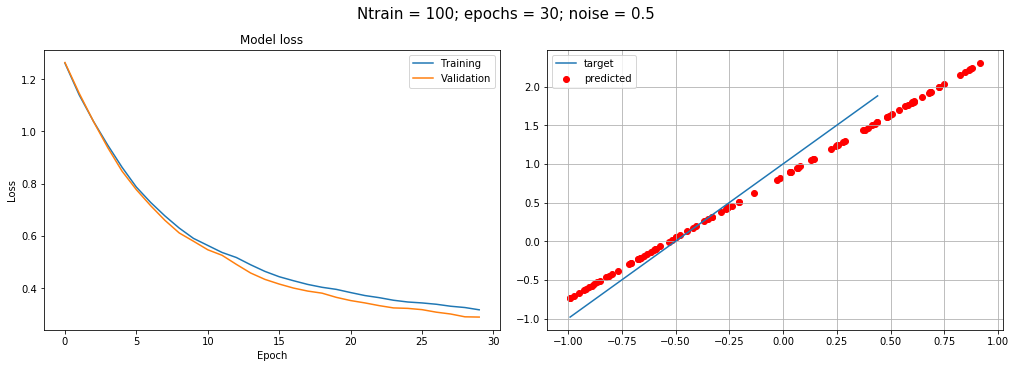

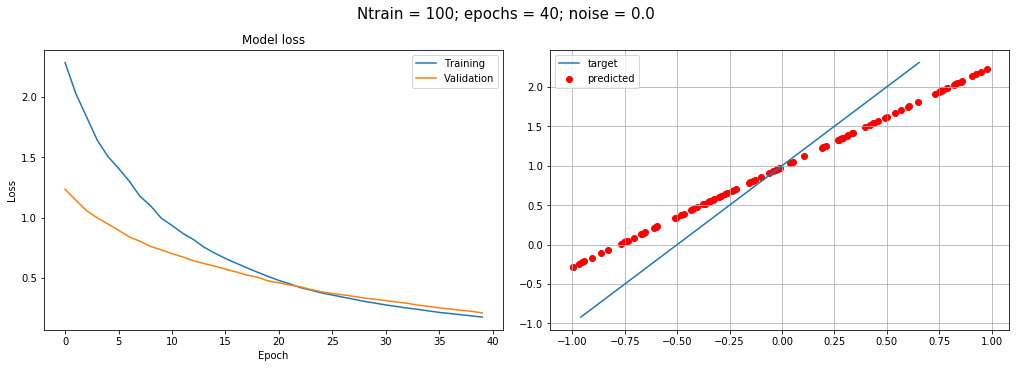

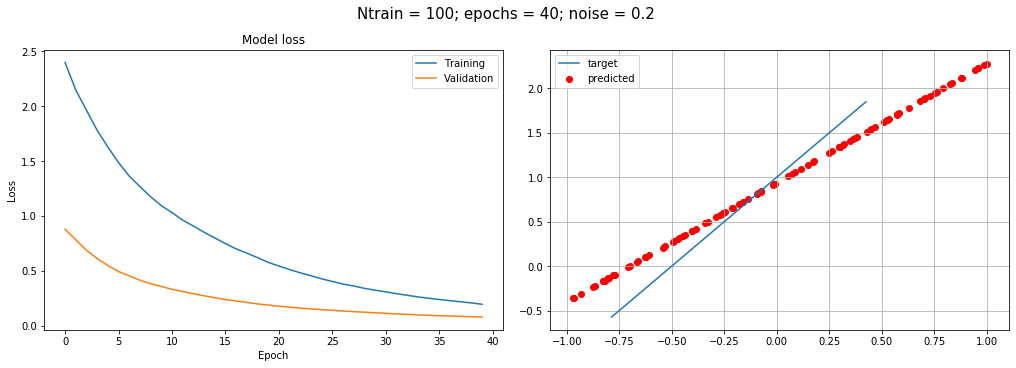

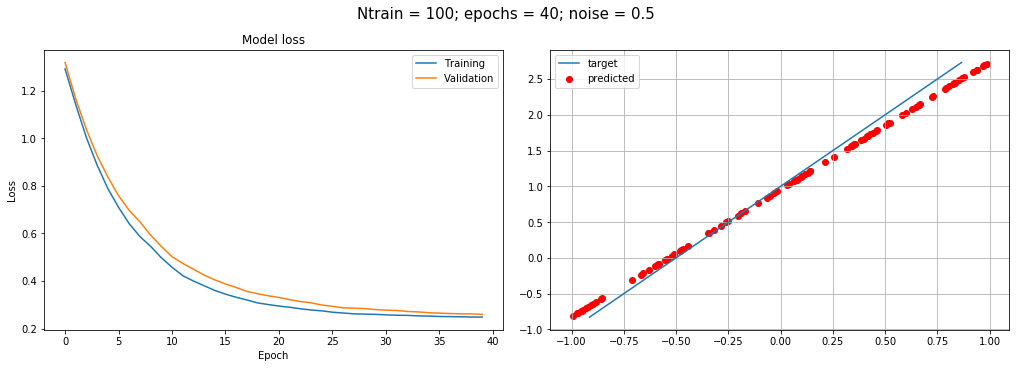

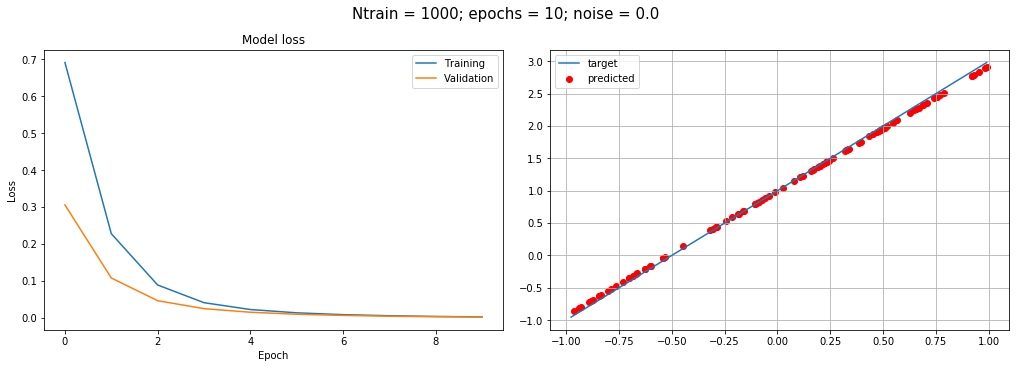

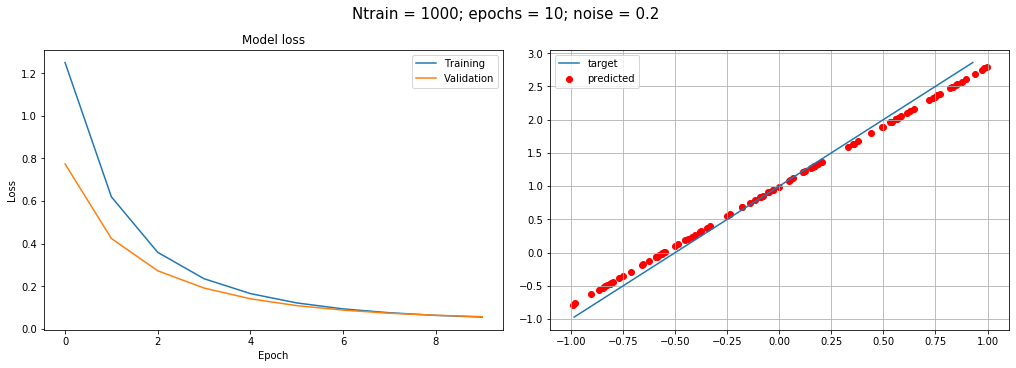

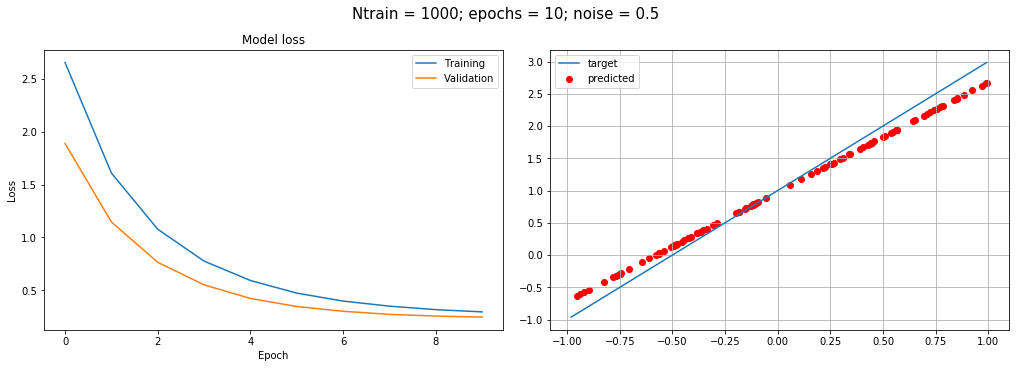

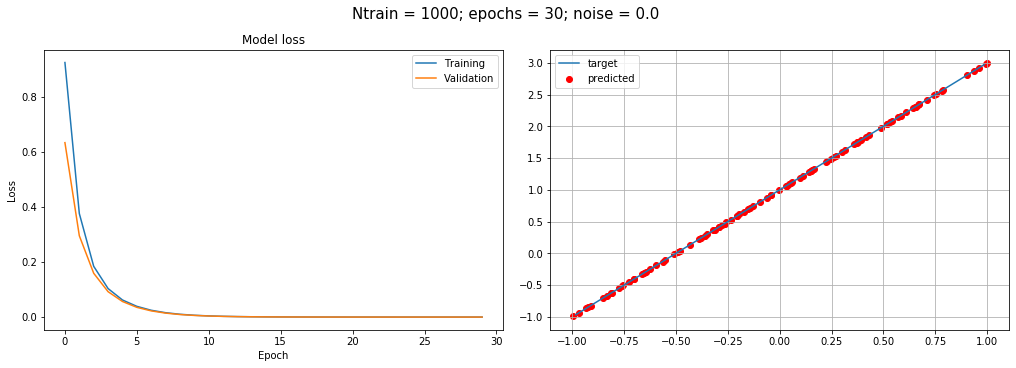

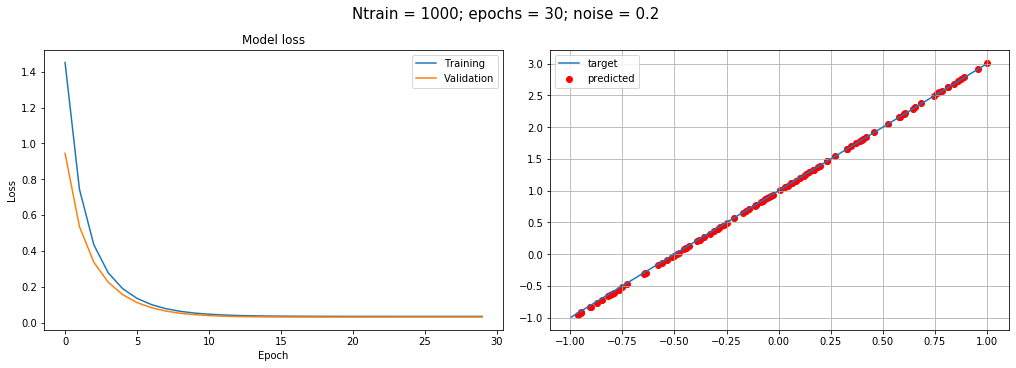

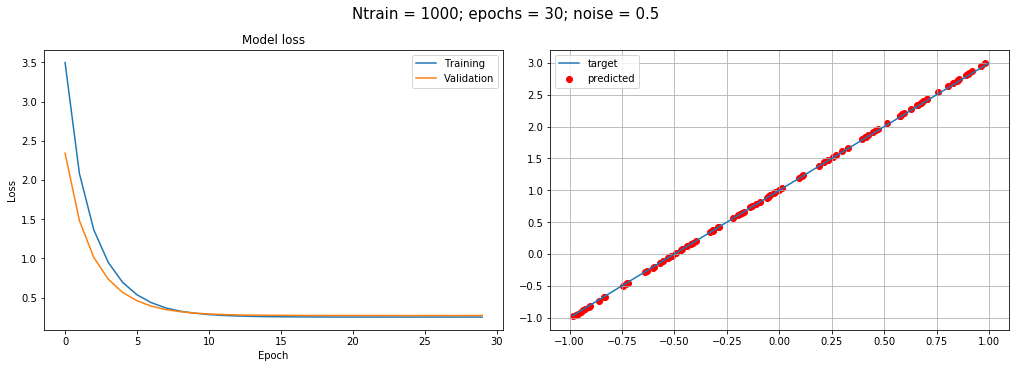

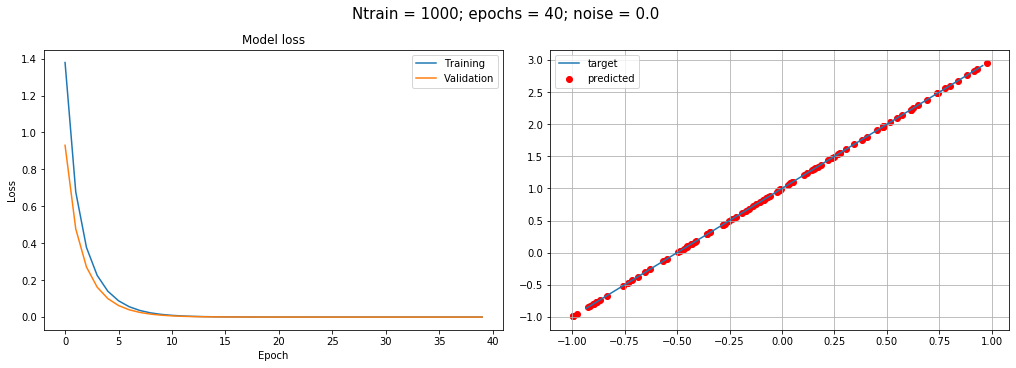

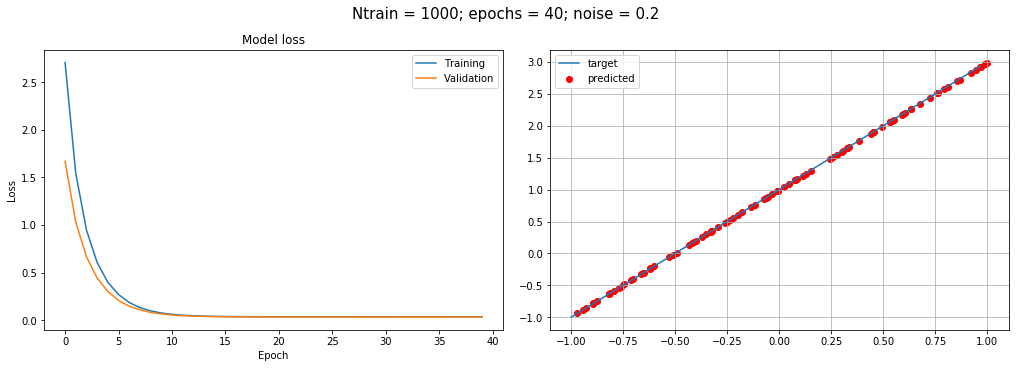

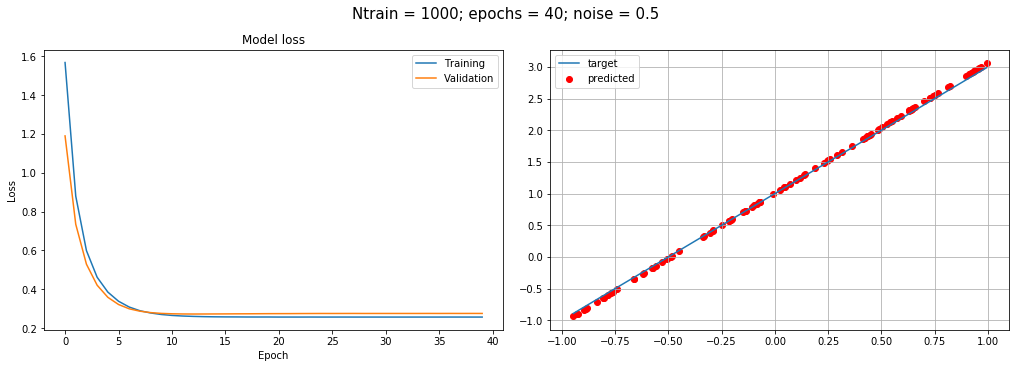

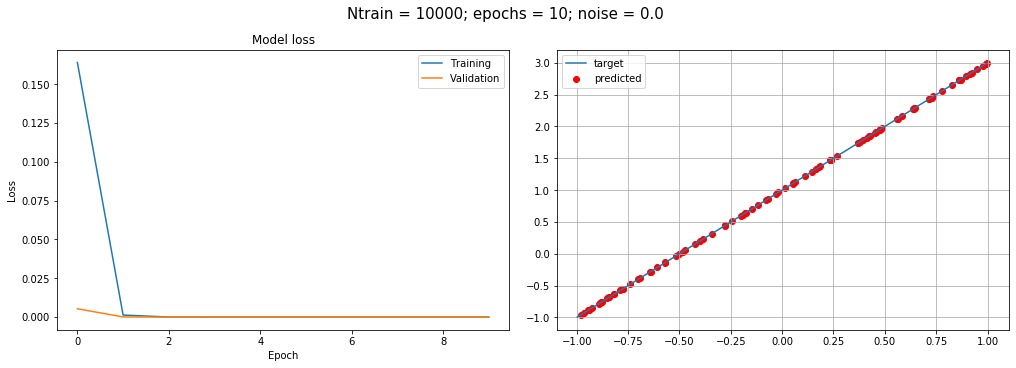

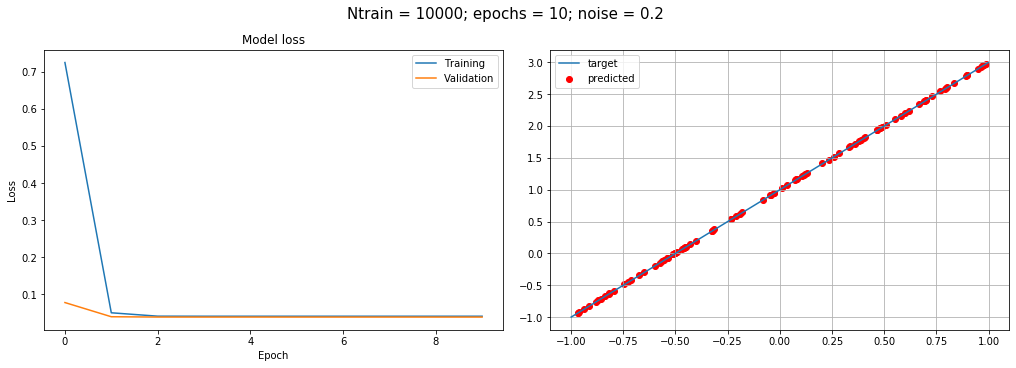

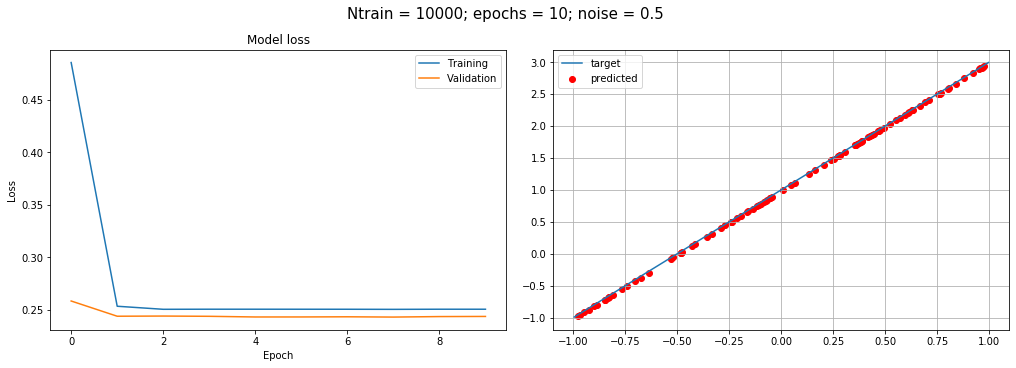

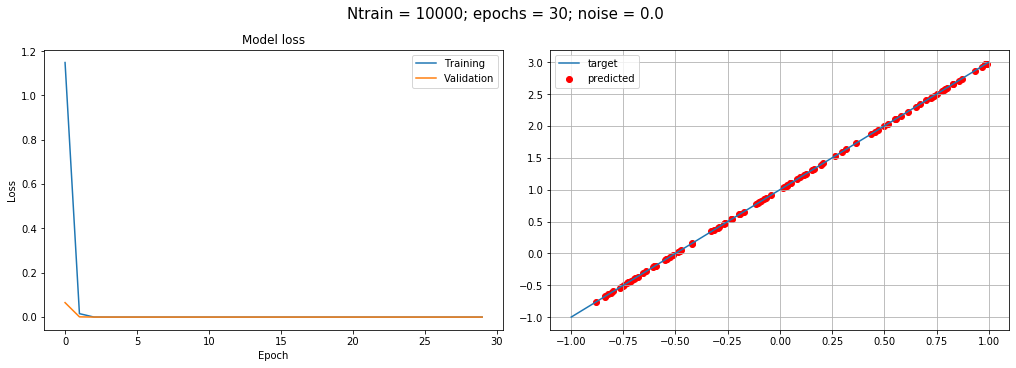

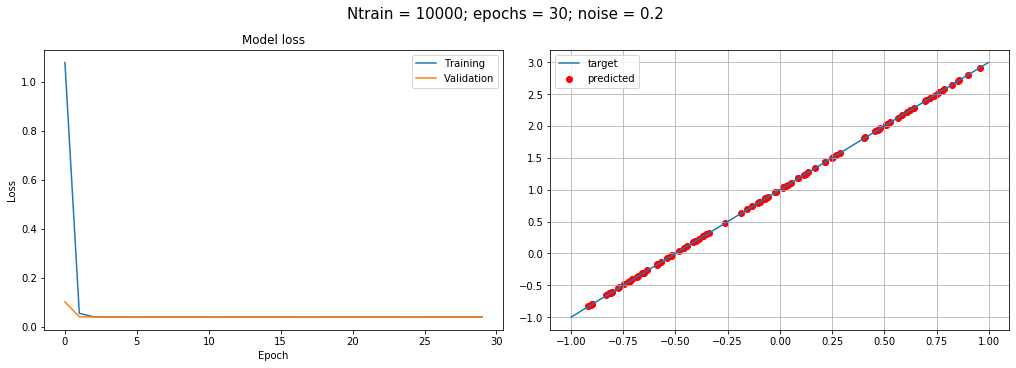

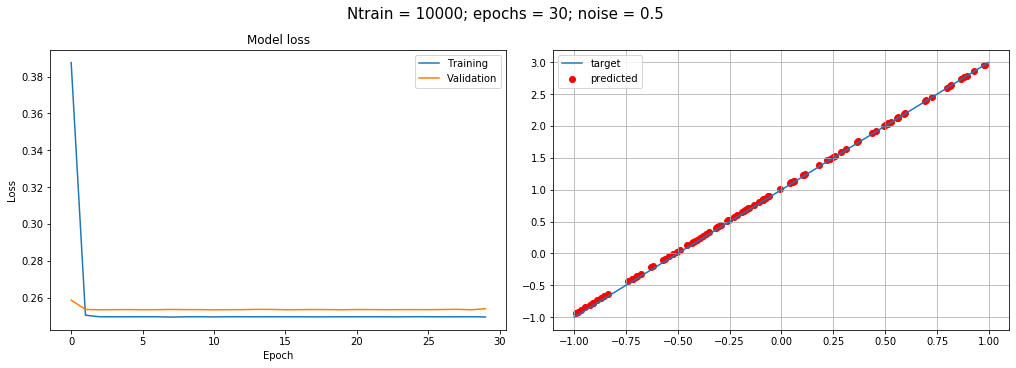

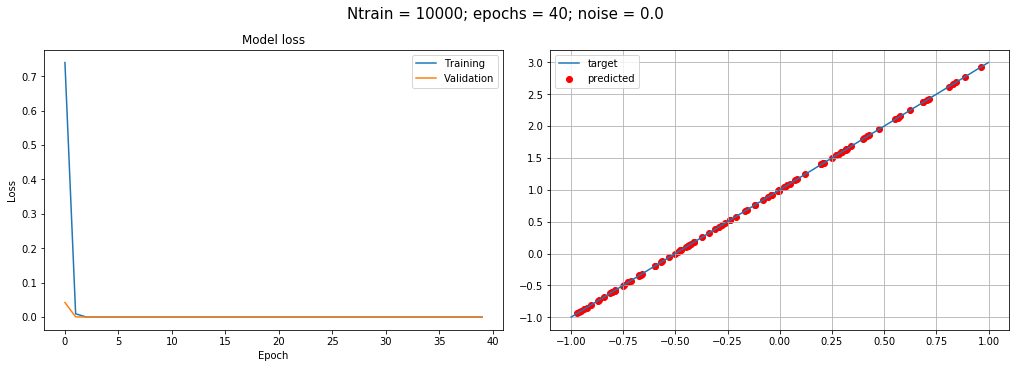

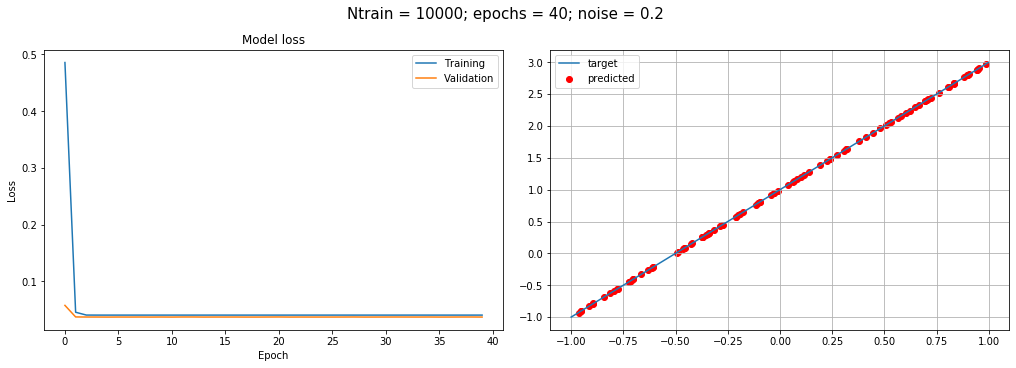

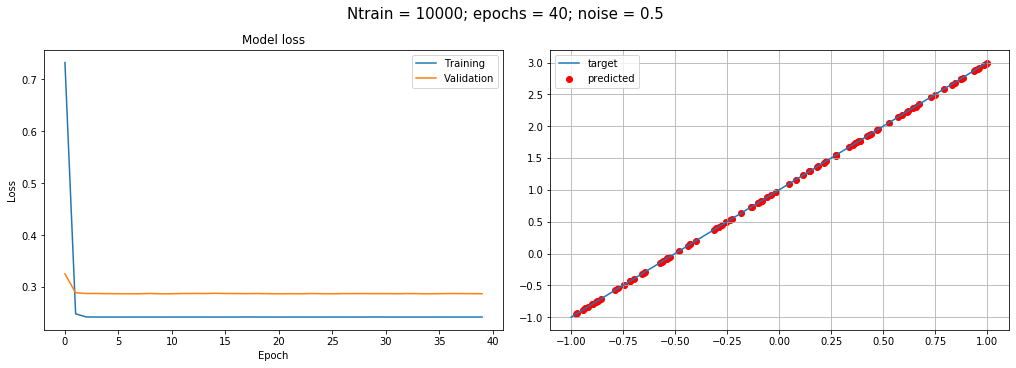

In [3]:
# target parameters of f(x) = m*x + b 
m = 2 # slope 
b = 1 # intersect 

np.random.seed(0)

# PARAMETERS
Nepos = np.array([10, 30, 40])
Ntrains = np.array([1e2, 1e3, 1e4]).astype(int)
sigmas = np.array([0, 0.2, 0.5])

    
for Ntrain in Ntrains:
    for Nepo in Nepos:  
        for sigma in sigmas:
            
            # compose the NN model
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,))) #here I could add activation type

            # compile the model choosing optimizer, loss and metrics objects
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

            x_train = np.random.uniform(-1, 1, Ntrain) 
            y_train = np.random.normal(m * x_train + b, sigma)
            
            x_valid = np.random.uniform(-1, 1, int(Ntrain/10))
            x_valid.sort()
            y_valid = np.random.normal(m * x_valid + b, sigma)

            y_target = m * x_valid + b # ideal (target) linear function
            
            # fit the model using training dataset
            # over 10 epochs of 32 batch size each
            # report training progress against validation data
            history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=Nepo, verbose=0,
            shuffle=True,
            validation_data=(x_valid, y_valid))
           
            # look into training history
            # Plot training & validation loss values
            fig, axs = plt.subplots(1,2, figsize=(14,5), constrained_layout=True)
            title = "Ntrain = {0}; epochs = {1}; noise = {2} ".format(Ntrain, Nepo, sigma)
            fig.suptitle(title, fontsize=15 )
            axs[0].plot(history.history['loss'], label='Training')
            axs[0].plot(history.history['val_loss'], label='Validation')
            axs[0].set_title('Model loss')
            axs[0].set_ylabel('Loss')
            axs[0].set_xlabel('Epoch')
            axs[0].legend( loc='best')

            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            axs[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
            axs[1].plot(x_valid, y_target, label='target')
            axs[1].grid(True)
            axs[1].legend()
            plt.show()

### Commenti
La prima cosa che si osserva è che sostanzialmente in tutti i casi si ottiene il valore di loss per il dataset di validazione minore che per il dataset di training. Si osserva che il problema è marcato nei casi in cui il fit è completamente sbagliato, questo suggerisce che il problema sta nella forte differenza di taglia dei dataset. Nel caso di un fit totalmente sbagliato, più è grande il dataset, più si possono avere dei risultati anche enormemente sbagliati, e questo aumenta  la loss del dataset di training. 

Si nota anche che per $N_{train} = 100$, i valori di loss non convergono, significa che il dataset di allenamento è troppo piccolo. Nel riquadro di destra si può vedere che il fit è sbagliato.

Si trovano come ottimali valori di $N_{train}$ tra i $10^3$ e $10^4$, $30$ e $40$ epoche. In assenza di rumore si può andare incontro a overfitting, meglio attenersi tra i $0.2$ e $0.5$